# Time Series Analysis of Sorted ASAS-SN

This time series analysis of sorted ASAS-SN data was an endeavor to substantiate the presence of relevant planet signals for the high, proper-motion G-type star HD 20794.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.timeseries import LombScargle

### Fonts and Sizes

Here we keep variables to have consistent fonts and plot sizes throughout this analysis. 

In [5]:
title_font = 18
label_font = 14
text_font = 12
figsize = (9, 5)

### Stellar signals

These are variables holding the periods for a number of planets, with some being possible signals for planets. Specifically, planets c, f, and g are possible planet signals. These are found in the paper linked above. Planet d has the variable <tt>pld</tt> due to conflicts with the import of pandas. The planet c signal is reported to be the possible rotation period of HD~20794, so we will use that as our rp variable.

In [6]:
pb = 18.33
pc = 43.17
pld = 88.90
pe = 147.02
pf = 331.41
pg = 11.86
rp = pc

### Base Functions & Variables

Below is a single function and variables that are used throughout the notebook. The first code cell contains variables used in the following functions and contains the relevant planet signals from the previous code cell.

The <tt>freq_vlines</tt> function is for creating vertical lines at the proper positions for the each stellar signal. 

In [7]:
planets = [1/pb, 1/pc, 1/pld, 1/pe, 1/pf, 1/pg]
planet_labels = ['b (1/18.33)', 'c (1/43.17)', 'd (1/88.90)', 'e (1/147.02)', 'f (1/331.41)', 'g (1/11.86)']
color_array = ['red', 'black', 'green', 'orange', 'purple', 'magenta']

In [8]:
def freq_vlines():
    for p, p_l, c_a in zip(planets, planet_labels, color_array):
        plt.axvline(p, linestyle='--', color=c_a, alpha=0.7, label=p_l)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

## Sorted ASAS-SN Dataset

We define a variable to contain the data from ASAS-SN. The file path would need to be adjusted based on where you have the file. For this ASAS-SN dataset, we reject any data with a C or D-grade, and sorted it by HJD. We also treated each magnitude as a seperate time series, and calculated Lomb-Scargle periodograms for each one. Lastly, we cut the first two observing seasons, along with doing a 3$\sigma# cliping on each time series. 

A total of 100 rows of data was rejected due to being C or D-grade, with 42 rows being C grade, and 58 rows being D grade. We cut the first two observing seasons by skipping rows with HJD values below 2300. This cut 140 rows from that made up the first two observing seasons. The latest points in the first two observing seasons was an HJD of 2262.59505, while the earliest point in the preceding season is an HJD of 2453.88715. After sorting, a total of 240 rows were removed.

In [9]:
data_sorted = "/Users/andrewandmatthewfonseca/NWelch/HD20794/HD20794_ASAS_Sorted.csv"
table_sorted = pd.read_csv(data_sorted, comment='#', delim_whitespace=True)
colnames = ['HJD', 'MAG_4', 'MAG_0', 'MAG_1', 'MAG_2', 'MAG_3', 'MER_4', 'MER_0', 'MER_1', 'MER_2', 'MAG_3', 'GRADE', 'FRAME']
print(table_sorted)

            HJD  MAG_4  MAG_0  MAG_1  MAG_2  MAG_3  MER_4  MER_0  MER_1  \
0    2453.88715  4.639  4.632  4.541  4.605  4.640  0.028  0.034  0.032   
1    2460.87531  4.667  4.703  4.617  4.654  4.665  0.033  0.039  0.040   
2    2460.87531  5.070  6.488  6.089  5.692  5.350  0.026  0.039  0.039   
3    2460.87531  4.675  4.708  4.619  4.656  4.672  0.026  0.039  0.039   
4    2460.87531  5.062  6.484  6.087  5.689  5.343  0.033  0.039  0.040   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
473  5131.75124  4.765  5.109  4.959  4.842  4.788  0.043  0.043  0.038   
474  5135.75219  4.774  5.131  5.003  4.849  4.795  0.048  0.047  0.041   
475  5144.78270  4.757  5.005  4.942  4.852  4.780  0.051  0.051  0.046   
476  5162.65814  4.763  5.141  4.929  4.826  4.773  0.052  0.052  0.042   
477  5164.74439  4.677  5.042  4.848  4.739  4.688  0.050  0.073  0.046   

     MER_2  MER_3 GRADE   FRAME  
0    0.025  0.026     A    9741  
1    0.032  0.033     A   10307

In [13]:
hjd, mag4, mag0, mag1, mag2, mag3 = np.loadtxt(data_sorted, skiprows=1, unpack=True, usecols=[0, 1, 2, 3, 4, 5])

## Scatter Plot and Sigma Clipping

Here we create a scatter plot using the sorted ASAS-SN data that was unpacked in the previous code cells. We also apply a sigma clipping of 3$\sigma$. These are done in functions, where each individual magnitude is passed so we can do 5 different time series analysis.

In [14]:
def sigma_clipping(set_hjd, set_mag):
    std_dev = np.std(set_mag)
    good_data = np.where(np.abs(set_mag - np.mean(set_mag)) < 3 * std_dev)[0]
    set_hjd = set_hjd[good_data]
    set_mag = set_mag[good_data] 
    return set_hjd, set_mag

In [18]:
def ASAS_scatter_plot(set_hjd, set_mag, mag_num):
    plt.figure(figsize=figsize)
    plt.scatter(set_hjd, set_mag)
    plt.title(f'ASAS-SN Scatter Plot (MAG_{mag_num})', fontsize=title_font)
    plt.xlabel('HJD (d)', fontsize=label_font)
    plt.ylabel('Magnitude', fontsize=label_font)
    plt.tick_params(axis='both', which='major', labelsize=text_font)
    plt.show()

In [16]:
hjd4, clip_mag4 = sigma_clipping(hjd, mag4)
hjd0, clip_mag0 = sigma_clipping(hjd, mag0)
hjd1, clip_mag1 = sigma_clipping(hjd, mag1)
hjd2, clip_mag2 = sigma_clipping(hjd, mag2)
hjd3, clip_mag3 = sigma_clipping(hjd, mag3)

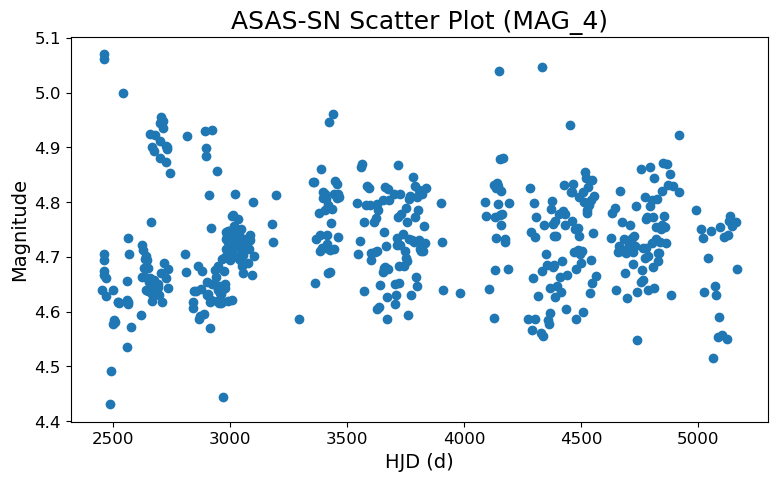

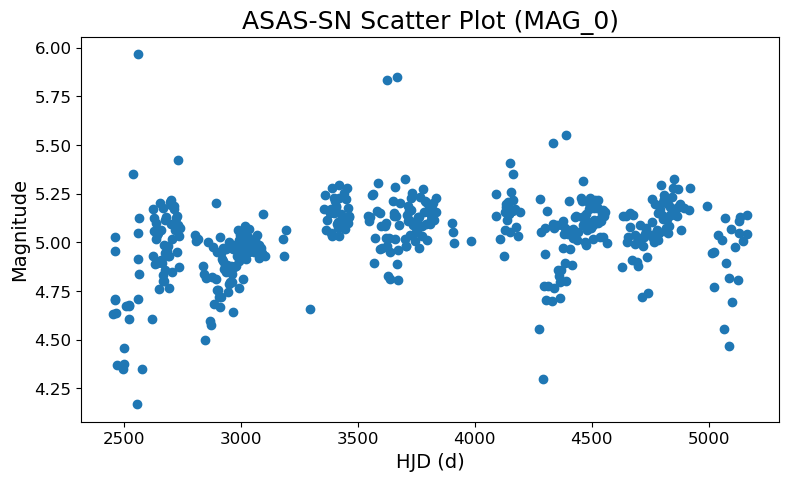

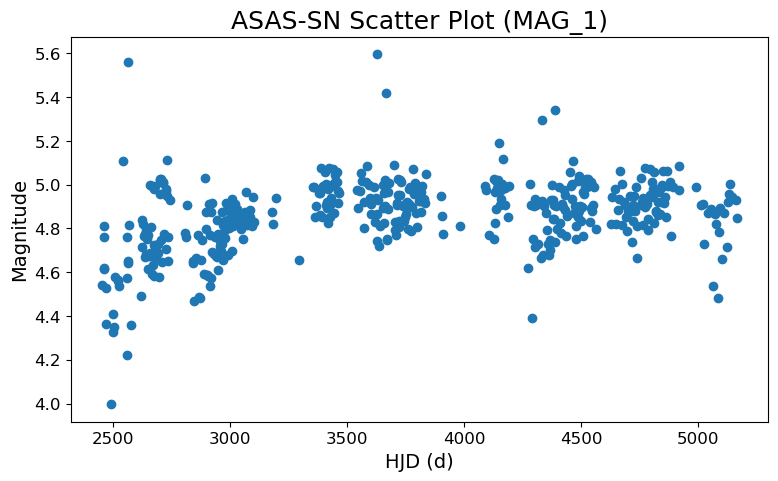

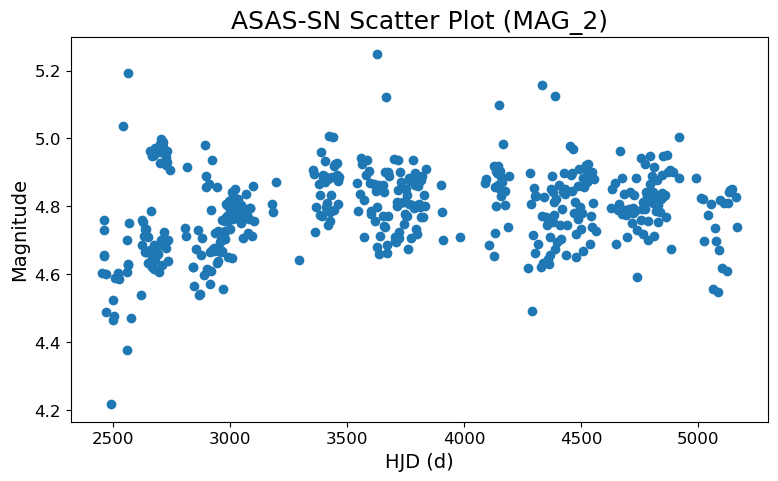

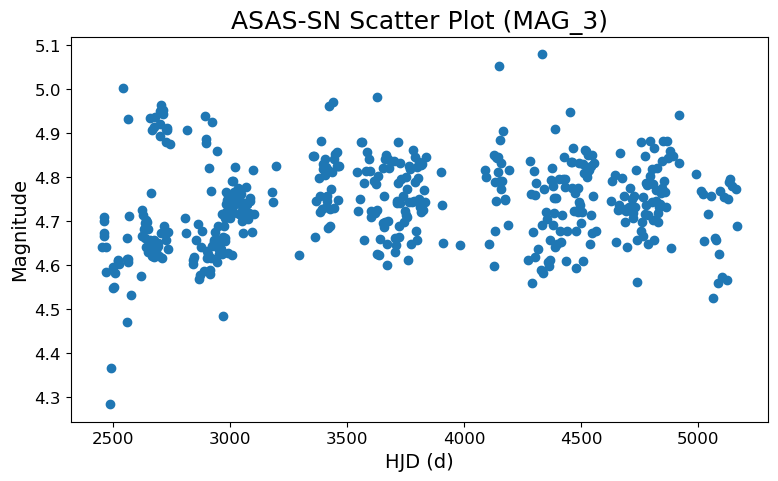

In [19]:
ASAS_scatter_plot(hjd4, clip_mag4, '4')
ASAS_scatter_plot(hjd0, clip_mag0, '0')
ASAS_scatter_plot(hjd1, clip_mag1, '1')
ASAS_scatter_plot(hjd2, clip_mag2, '2')
ASAS_scatter_plot(hjd3, clip_mag3, '3')

## Periodogram

We create a periodogram from the LombScargle function using the data from the sorted ASAS-SN data. A function was created again to pass each magnitude through to create six different periodograms. We can see the six different vertical lines that correspond to each individual planet signal with each of these periodograms.

In [34]:
def ASAS_periodogram(set_hjd, set_mag, mag_num):
    freq, power = LombScargle(set_hjd, set_mag, normalization = 'psd').autopower(nyquist_factor=2)
    plt.figure(figsize=figsize)
    plt.semilogy(freq, power)
    plt.title(f'ASAS-SN Periodogram (MAG_{mag_num})', fontsize=title_font)
    plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
    plt.ylabel(r"Power ($\operatorname{mag}^2$ day)", fontsize=label_font)
    plt.tick_params(axis='both', which='major', labelsize=text_font)
    plt.xlim(0, 0.1)
    freq_vlines()

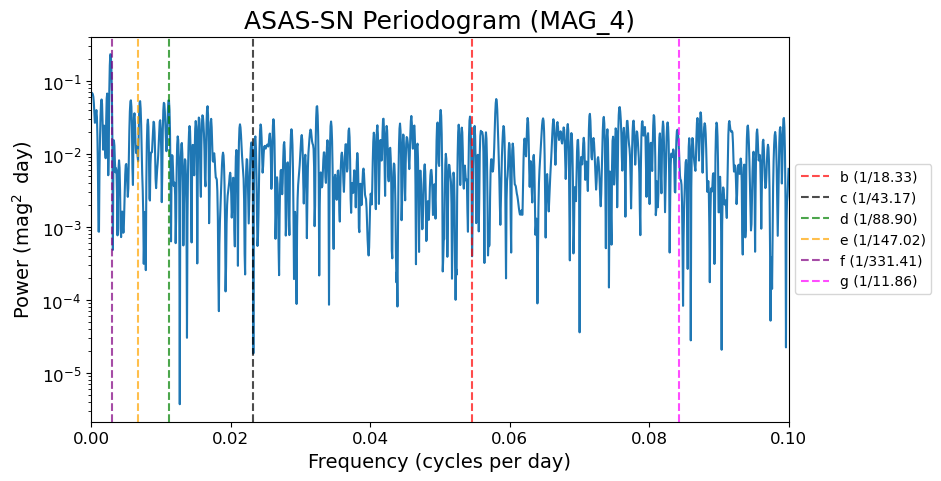

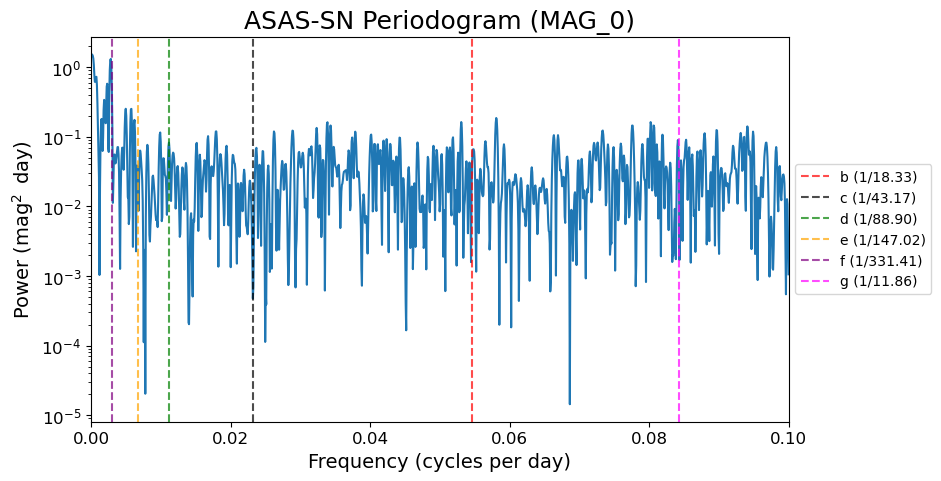

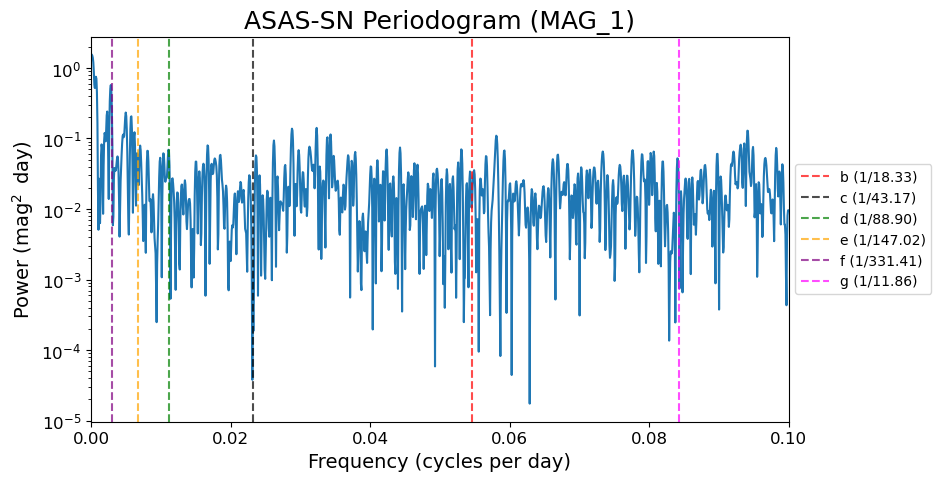

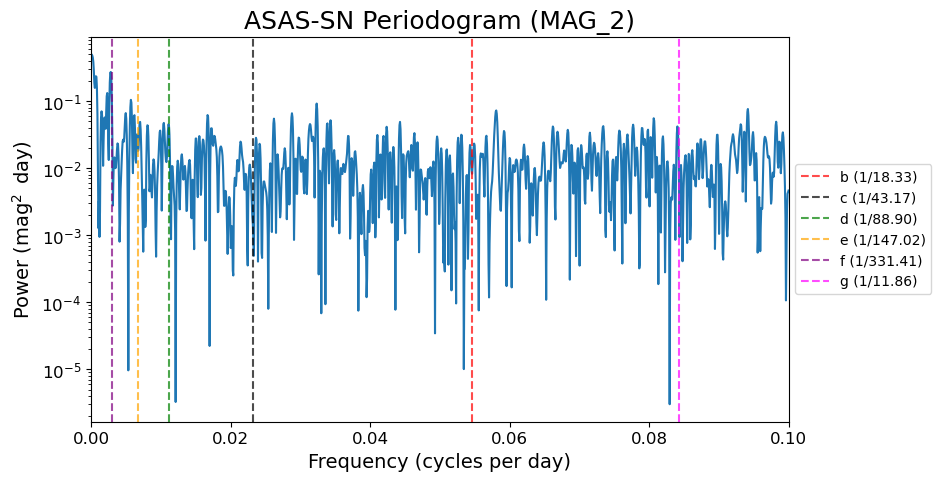

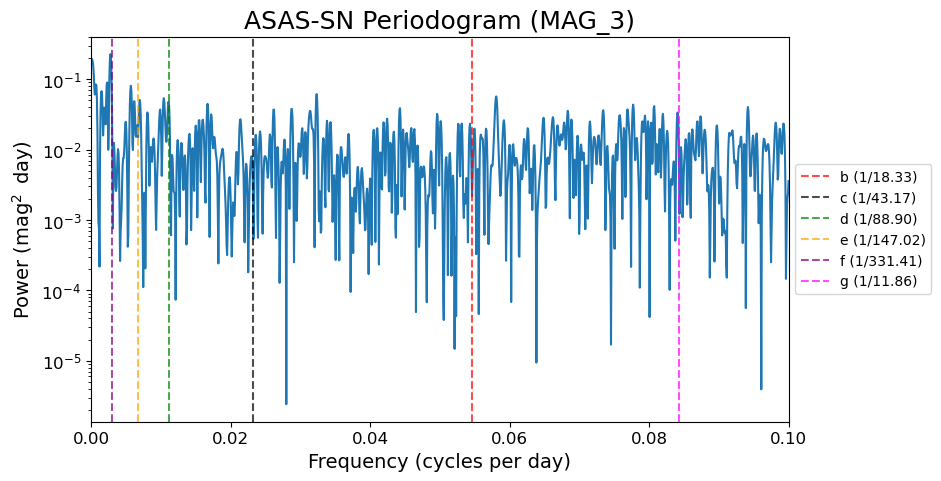

In [35]:
ASAS_periodogram(hjd4, clip_mag4, '4')
ASAS_periodogram(hjd0, clip_mag0, '0')
ASAS_periodogram(hjd1, clip_mag1, '1')
ASAS_periodogram(hjd2, clip_mag2, '2')
ASAS_periodogram(hjd3, clip_mag3, '3')

## Spectral Window

A spectral window is created below using the data found in the ASAS-SN dataset, using a nyquist factor of 2. The red vertical line is for the planet f signal, as it may be due to interference. If this is due to interference, it would be possible to for it to be seen in the spectral window. Each different sigma clipped time series gets its own spectral window, and they have slight differences between them.

In [42]:
def ASAS_spectral(set_hjd, hjd_num):
    freq, specwin = LombScargle(set_hjd - set_hjd[0], np.ones(len(set_hjd)), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)
    plt.figure(figsize=figsize)
    plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
    plt.title(f'ASAS-SN Spectral Window (HJD_{hjd_num})', fontsize=title_font)
    plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
    plt.ylabel(r"$W(f)$", fontsize=label_font)
    plt.axvline(x=1/pf, linestyle='--', color='red')
    plt.axvline(x=-(1/pf), linestyle='--', color='red')
    plt.tick_params(axis='both', which='major', labelsize=text_font)
    plt.xlim(-0.1, 0.1)
    plt.show()

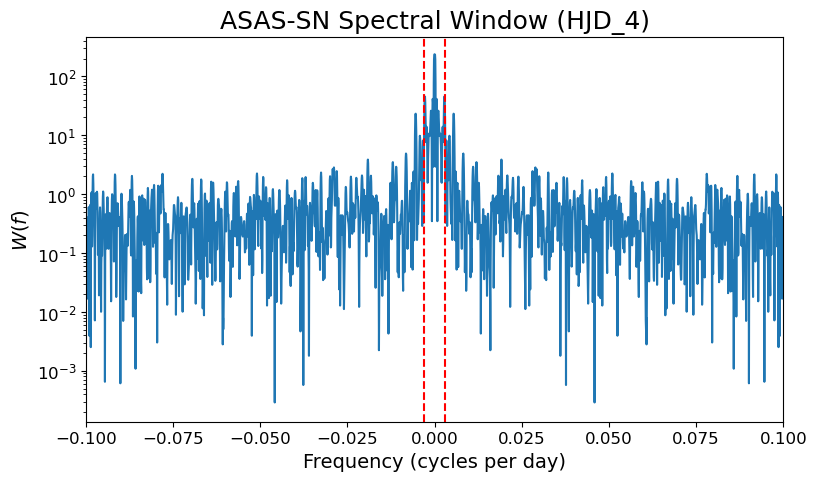

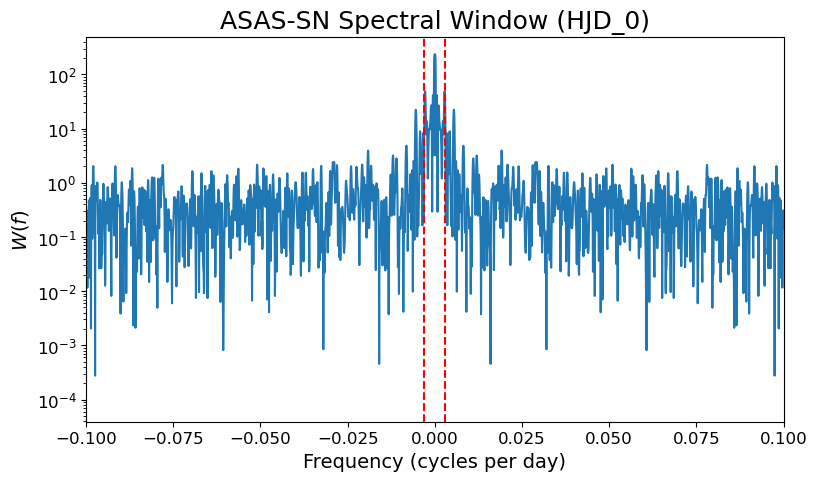

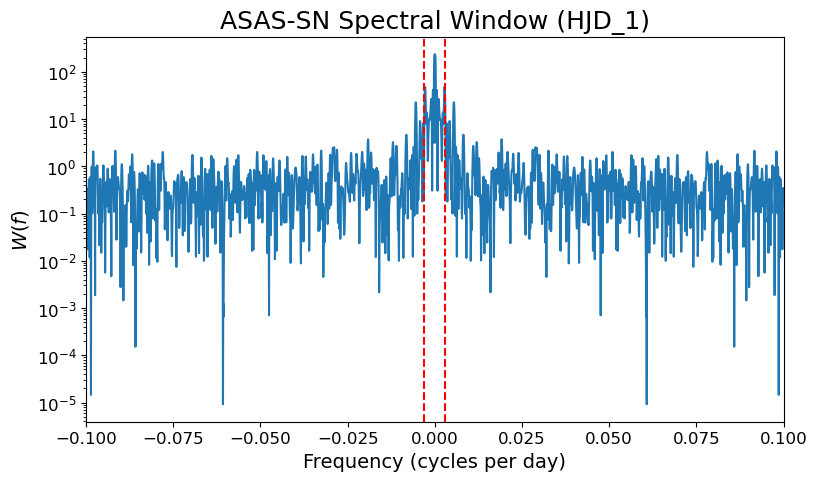

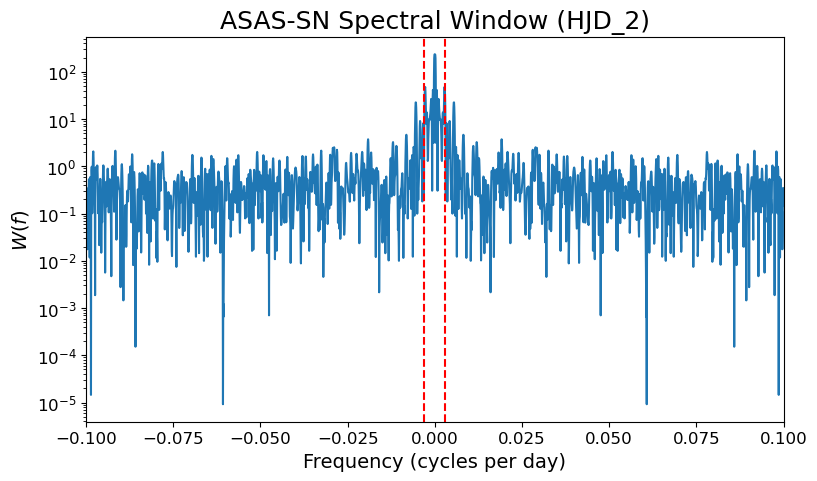

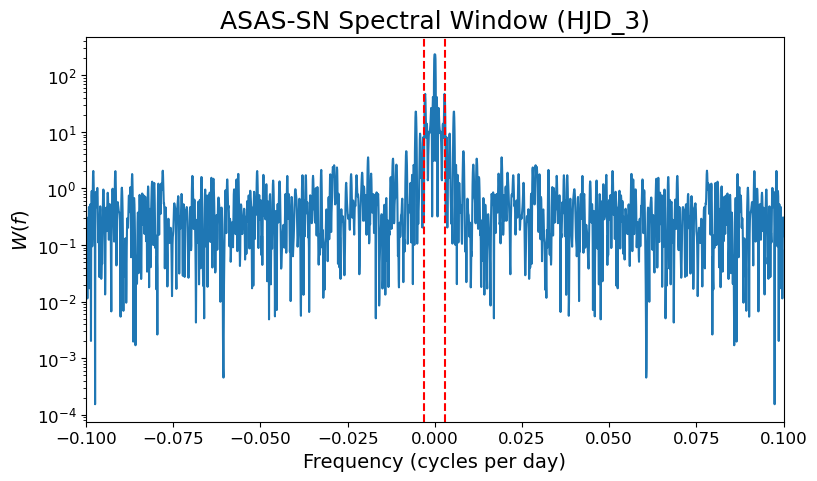

In [43]:
ASAS_spectral(hjd4, '4')
ASAS_spectral(hjd0, '0')
ASAS_spectral(hjd1, '1')
ASAS_spectral(hjd2, '2')
ASAS_spectral(hjd3, '3')

## Pseudo-Window

We create a pseudo-window from the data of the ASAS-SN dataset, using a nyquist factor of 2. Shows sensetivity to rotaiton period signal.

In [44]:
def ASAS_pseudo(set_hjd, hjd_num):
    freq, specwin = LombScargle(set_hjd - set_hjd[0], np.sin(2*np.pi*(set_hjd-set_hjd[0])/rp), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)
    plt.figure(figsize=figsize)
    plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
    plt.title(f'ASAS-SN Pseudo-Window (HJD_{hjd_num})', fontsize=title_font)
    plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
    plt.ylabel(r"$W(f)$", fontsize=label_font)
    plt.tick_params(axis='both', which='major', labelsize=text_font)
    freq_vlines()

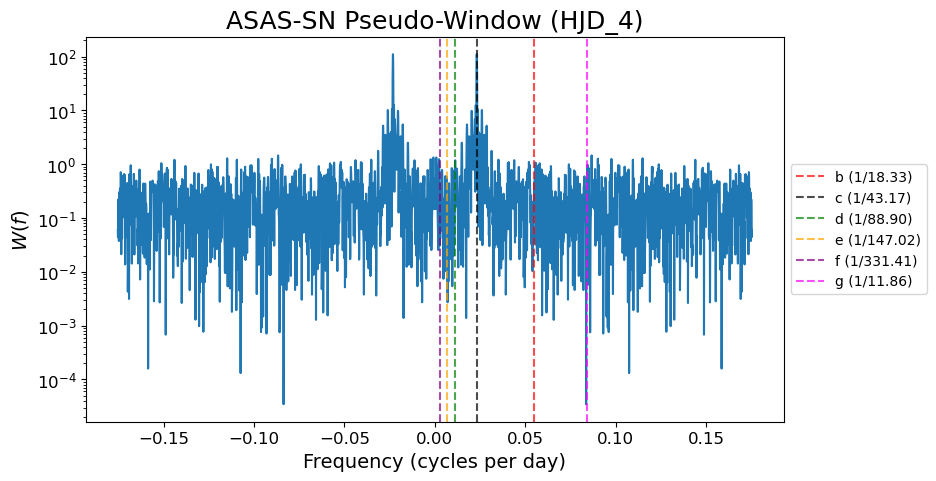

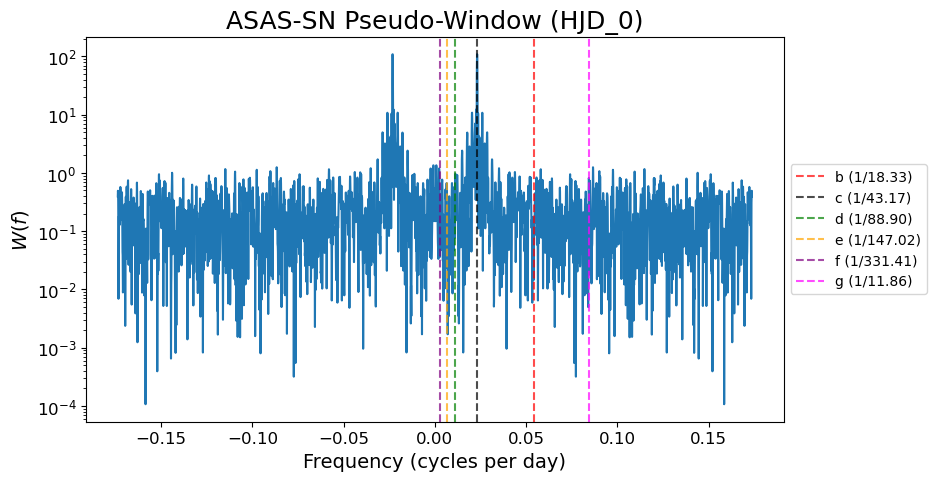

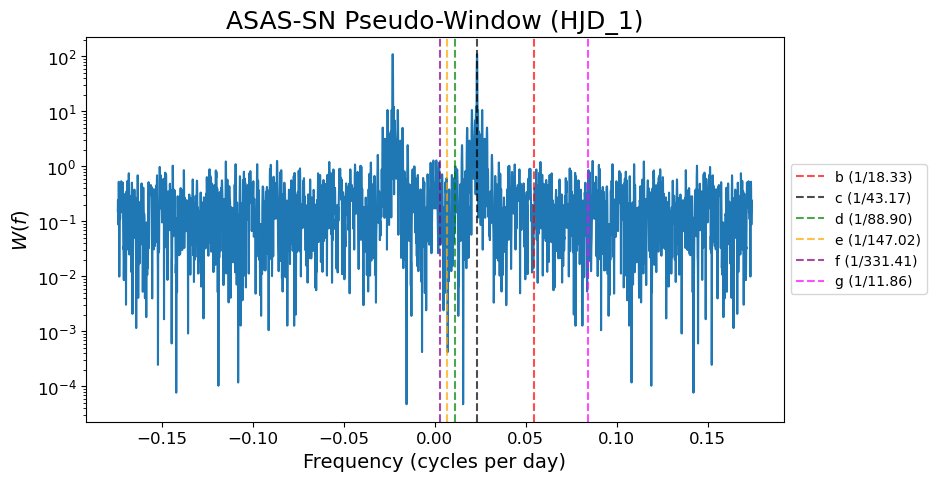

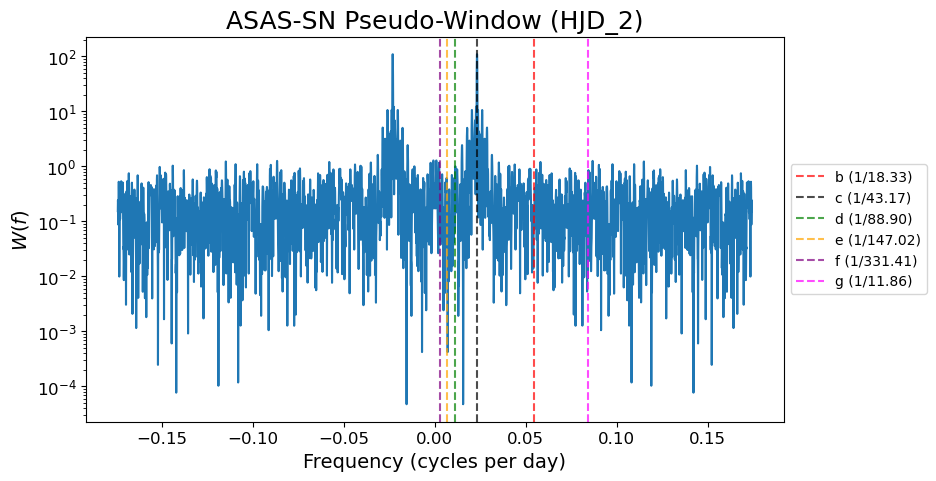

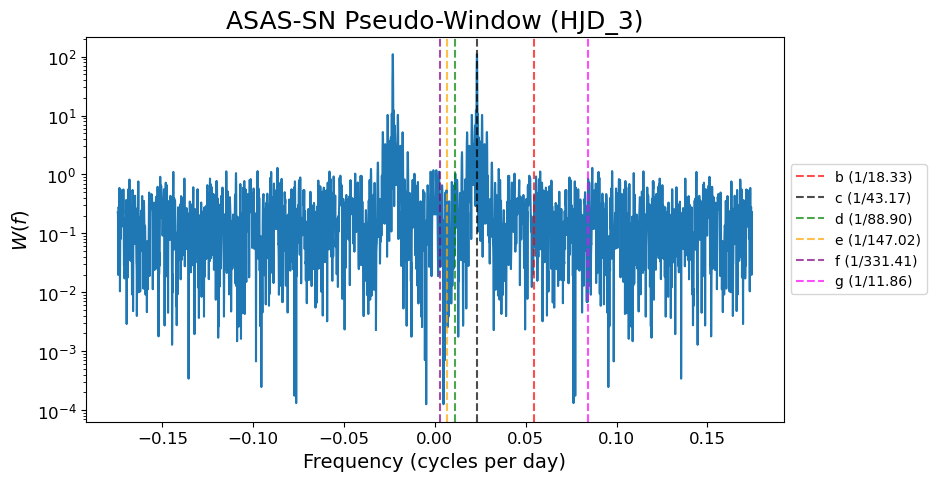

In [45]:
ASAS_pseudo(hjd4, '4')
ASAS_pseudo(hjd0, '0')
ASAS_pseudo(hjd1, '1')
ASAS_pseudo(hjd2, '2')
ASAS_pseudo(hjd3, '3')